<a href="https://colab.research.google.com/github/ajay47847/pcg_classification/blob/main/FilterNormAbr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample, butter, filtfilt

def apply_filter(data, sample_rate, filter_type, cutoff_freqs):
    nyquist = 0.5 * sample_rate
    normalized_cutoff = [freq / nyquist for freq in cutoff_freqs]
    b, a = butter(N=1, Wn=normalized_cutoff, btype=filter_type)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Load the audio files
sample_rate1, audio_data1 = wavfile.read('/content/f0096.wav')
sample_rate2, audio_data2 = wavfile.read('/content/f0015.wav')


# Extract 2.5 seconds of audio
duration = 2.5
num_samples1 = int(duration * sample_rate1)
num_samples2 = int(duration * sample_rate2)
audio_data1 = audio_data1[:num_samples1]
audio_data2 = audio_data2[:num_samples2]

# Resample the audio to 1000 Hz
resample_rate = 1000
num_resampled_samples1 = int(duration * resample_rate)
num_resampled_samples2 = int(duration * resample_rate)
audio_data1_resampled = resample(audio_data1, num_resampled_samples1)
audio_data2_resampled = resample(audio_data2, num_resampled_samples2)

# Apply lowpass, highpass, and bandpass filters
audio_data1_lowpass = apply_filter(audio_data1_resampled, resample_rate, 'low', [200])
audio_data2_lowpass = apply_filter(audio_data2_resampled, resample_rate, 'low', [200])

audio_data1_highpass = apply_filter(audio_data1_resampled, resample_rate, 'high', [200])
audio_data2_highpass = apply_filter(audio_data2_resampled, resample_rate, 'high', [200])

audio_data1_bandpass = apply_filter(audio_data1_resampled, resample_rate, 'band', [25, 400])
audio_data2_bandpass = apply_filter(audio_data2_resampled, resample_rate, 'band', [25, 400])

# Create time arrays for resampled data
time_resampled = np.arange(0, duration, 1 / resample_rate)


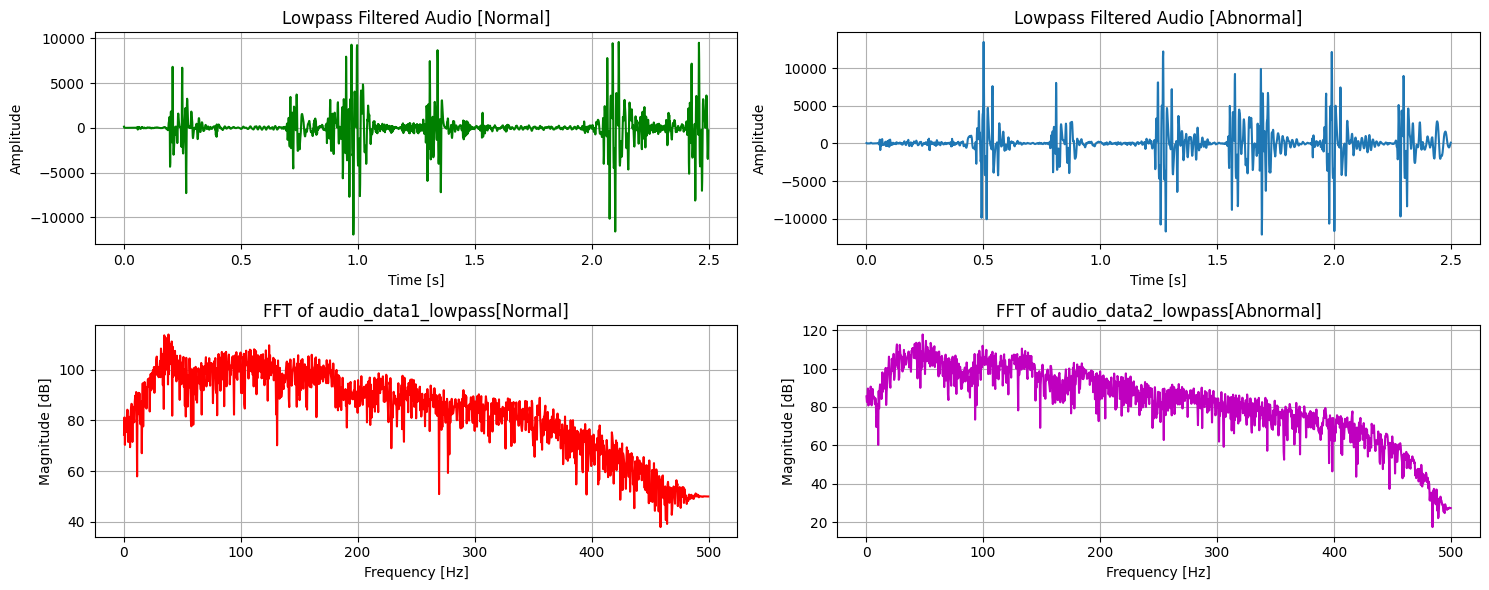

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.plot(time_resampled, audio_data1_lowpass,c='g')
plt.title('Lowpass Filtered Audio [Normal]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(time_resampled, audio_data2_lowpass)
plt.title('Lowpass Filtered Audio [Abnormal]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

fft_result = np.fft.fft(audio_data1_lowpass)
freq_values = np.fft.fftfreq(len(audio_data1_lowpass), 1/resample_rate)
plt.subplot(2,2,3)
fft_magnitude = np.abs(fft_result)
fft_magnitude_db = 20 * np.log10(fft_magnitude)
positive_freq_indices = freq_values > 0
plt.plot(freq_values[positive_freq_indices], fft_magnitude_db[positive_freq_indices],c='r')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('FFT of audio_data1_lowpass[Normal]')
plt.grid(True)

fft_result = np.fft.fft(audio_data2_lowpass)
freq_values = np.fft.fftfreq(len(audio_data2_lowpass), 1/resample_rate)
plt.subplot(2,2,4)
fft_magnitude = np.abs(fft_result)
fft_magnitude_db = 20 * np.log10(fft_magnitude)
positive_freq_indices = freq_values > 0
plt.plot(freq_values[positive_freq_indices], fft_magnitude_db[positive_freq_indices],c='m')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('FFT of audio_data2_lowpass[Abnormal]')
plt.grid(True)

plt.tight_layout()
plt.show()

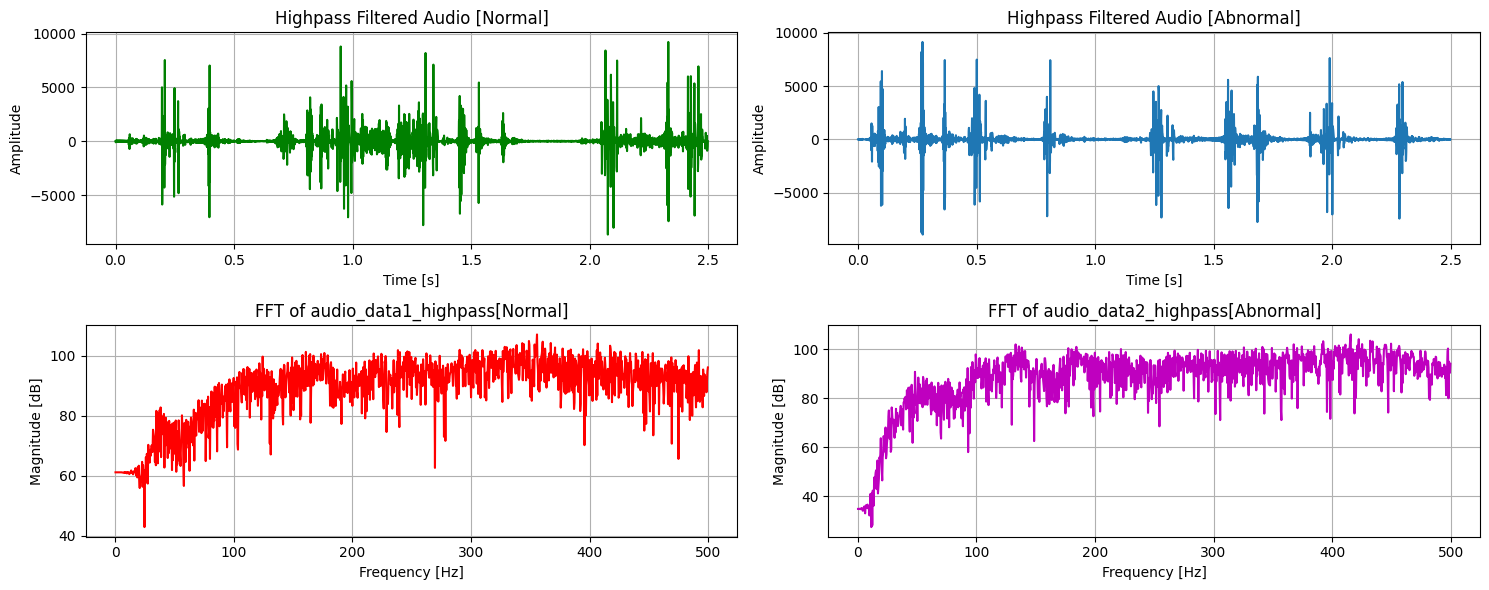

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.plot(time_resampled, audio_data1_highpass,c='g')
plt.title('Highpass Filtered Audio [Normal]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(time_resampled, audio_data2_highpass)
plt.title('Highpass Filtered Audio [Abnormal]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

fft_result = np.fft.fft(audio_data1_highpass)
freq_values = np.fft.fftfreq(len(audio_data1_highpass), 1/resample_rate)
plt.subplot(2,2,3)
fft_magnitude = np.abs(fft_result)
fft_magnitude_db = 20 * np.log10(fft_magnitude)
positive_freq_indices = freq_values > 0
plt.plot(freq_values[positive_freq_indices], fft_magnitude_db[positive_freq_indices],c='r')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('FFT of audio_data1_highpass[Normal]')
plt.grid(True)

fft_result = np.fft.fft(audio_data2_highpass)
freq_values = np.fft.fftfreq(len(audio_data2_highpass), 1/resample_rate)
plt.subplot(2,2,4)
fft_magnitude = np.abs(fft_result)
fft_magnitude_db = 20 * np.log10(fft_magnitude)
positive_freq_indices = freq_values > 0
plt.plot(freq_values[positive_freq_indices], fft_magnitude_db[positive_freq_indices],c='m')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('FFT of audio_data2_highpass[Abnormal]')
plt.grid(True)

plt.tight_layout()
plt.show()

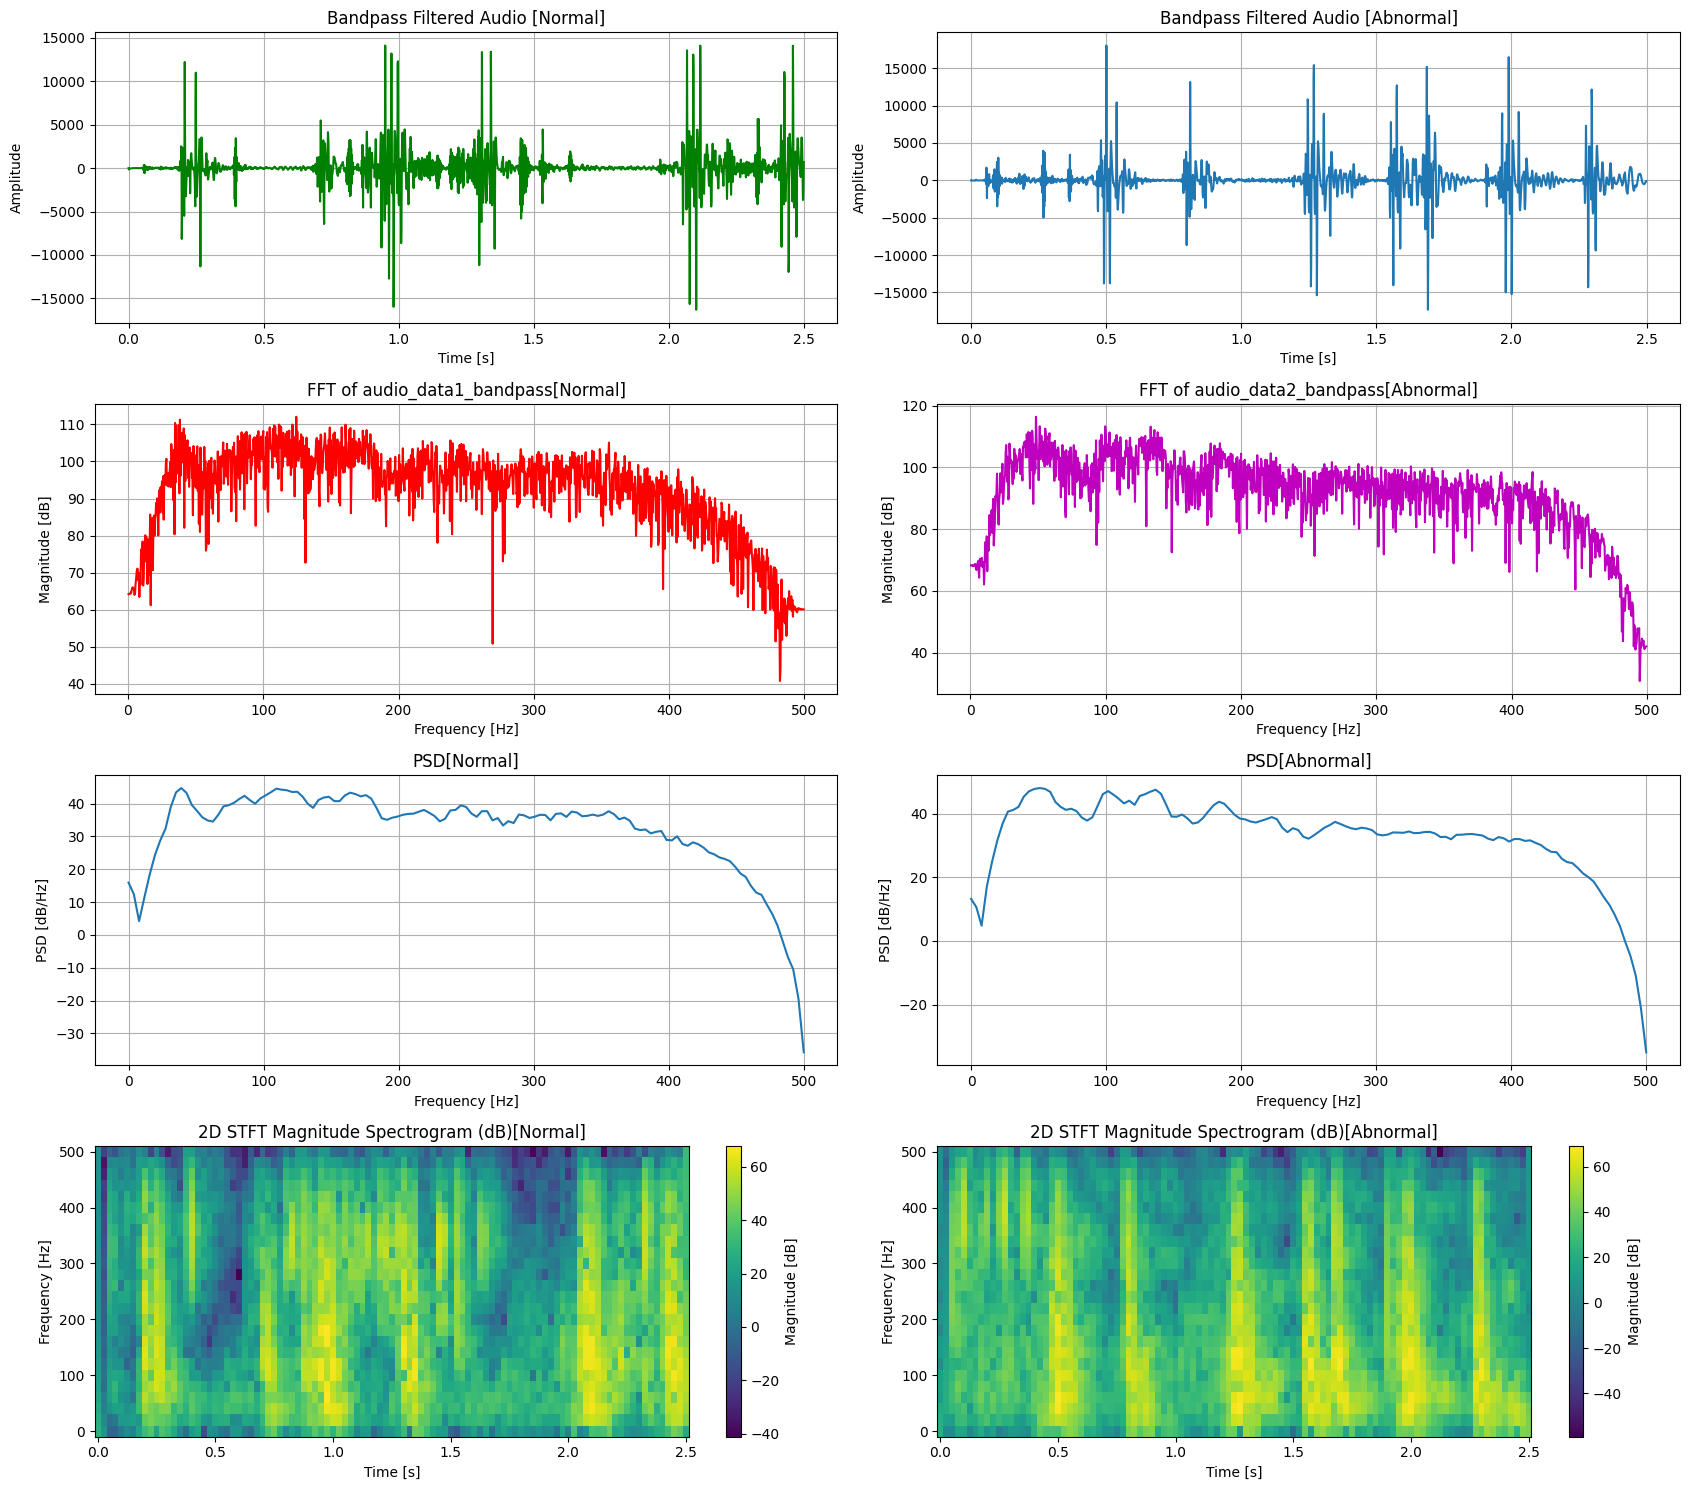

In [ ]:
from scipy.signal import stft
from scipy.signal import windows
from scipy.signal import welch

plt.figure(figsize=(17, 15))

plt.subplot(4, 2, 1)
plt.plot(time_resampled, audio_data1_bandpass,c='g')
plt.title('Bandpass Filtered Audio [Normal]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(4, 2, 2)
plt.plot(time_resampled, audio_data2_bandpass)
plt.title('Bandpass Filtered Audio [Abnormal]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

fft_result = np.fft.fft(audio_data1_bandpass)
freq_values = np.fft.fftfreq(len(audio_data1_bandpass), 1/resample_rate)
plt.subplot(4,2,3)
fft_magnitude = np.abs(fft_result)
fft_magnitude_db = 20 * np.log10(fft_magnitude)
positive_freq_indices = freq_values > 0
plt.plot(freq_values[positive_freq_indices], fft_magnitude_db[positive_freq_indices],c='r')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('FFT of audio_data1_bandpass[Normal]')
plt.grid(True)

fft_result = np.fft.fft(audio_data2_bandpass)
freq_values = np.fft.fftfreq(len(audio_data2_bandpass), 1/resample_rate)
plt.subplot(4,2,4)
fft_magnitude = np.abs(fft_result)
fft_magnitude_db = 20 * np.log10(fft_magnitude)
positive_freq_indices = freq_values > 0
plt.plot(freq_values[positive_freq_indices], fft_magnitude_db[positive_freq_indices],c='m')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('FFT of audio_data2_bandpass[Abnormal]')
plt.grid(True)

frequencies, psd = welch(audio_data1_bandpass,resample_rate)
plt.subplot(4, 2, 5)
psd_db = 10 * np.log10(psd)
plt.plot(frequencies, psd_db)
plt.title('PSD[Normal]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.grid(True)

frequencies, psd = welch(audio_data2_bandpass,resample_rate)
plt.subplot(4, 2, 6)
psd_db = 10 * np.log10(psd)
plt.plot(frequencies, psd_db)
plt.title('PSD[Abnormal]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.grid(True)

nperseg = 50
noverlap=25
f, t, Zxx = stft(audio_data1_bandpass,resample_rate, window='hann', nfft=nperseg, nperseg=nperseg,noverlap=noverlap,scaling='spectrum',return_onesided=True,padded=True)
Zxx_dB = 20 * np.log10(np.abs(Zxx))
plt.subplot(4, 2, 7)
plt.pcolormesh(t, f, Zxx_dB, shading='auto', cmap='viridis')
plt.title('2D STFT Magnitude Spectrogram (dB)[Normal]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude [dB]')

f, t, Zxx = stft(audio_data2_bandpass,resample_rate, window='hann', nfft=nperseg, nperseg=nperseg,noverlap=noverlap,scaling='spectrum',return_onesided=True,padded=True)
Zxx_dB = 20 * np.log10(np.abs(Zxx))
plt.subplot(4, 2, 8)
plt.pcolormesh(t, f, Zxx_dB, shading='auto', cmap='viridis')
plt.title('2D STFT Magnitude Spectrogram (dB)[Abnormal]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude [dB]')

plt.tight_layout()
plt.show()
